In [71]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
for conutry in ['Egypt', 'Hungary', 'Nigeria', 'Poland', 'Romania']:
    usd_path = 'Exchange Rate against USD Period Avg Monthly ' + conutry + '.csv'
    usd = pd.read_csv(usd_path)
    exr = usd.iloc[26:]
    usd_name = 'Exchange Rate against USD: Period Avg: Monthly: ' + conutry
    exr.rename(columns={'Unnamed: 0': 'Date', usd_name: 'US/Local'}, inplace = True)
    exr['Date'] = pd.to_datetime(exr['Date']) + pd.tseries.offsets.MonthEnd(0)
    exr['US/Local'] = np.round(exr['US/Local'].astype(float), 2)

    qtr_path = 'qtr_GDP_' + conutry + '.csv'
    qtr = pd.read_csv(qtr_path)
    data = qtr.iloc[26:]
    data.rename(columns={'Unnamed: 0': 'Date', 'Gross Domestic Product (GDP)': 'GDP in mil Local'}, inplace = True)
    data['Date'] = pd.to_datetime(data['Date']) + pd.tseries.offsets.MonthEnd(0)
    data['GDP in mil Local'] = np.round(data['GDP in mil Local'].astype(float), 2)

    if conutry == 'Egypt': data['GDP in mil Local'] *= 1e3

    f = sp.interpolate.CubicSpline(data['Date'], data['GDP in mil Local'], bc_type = 'natural')
    start = data['Date'].iloc[0]
    end = data['Date'].iloc[-1] + pd.DateOffset(months = 1)
    full = pd.date_range(start, end, freq = "M").to_series().reset_index(drop = True)
    GDPi = pd.Series(f(full))
    datai = pd.DataFrame({"Date": full, "GDP in mil Local": GDPi})

    datam = pd.merge(datai, exr, on = 'Date', how = 'left')
    datam['GDP in mil USD'] = np.round(datam['GDP in mil Local'] / datam['US/Local'], 2)

    csv_path = 'GDP_in_mil_USD_' + conutry + '.csv'
    datam.to_csv(csv_path, index = False)

In [36]:
usd = pd.read_csv("Exchange Rate against USD Period Avg Monthly Egypt.csv")

In [37]:
exr = usd.iloc[26:]

In [38]:
exr

,Unnamed: 0,Exchange Rate against USD: Period Avg: Monthly: Egypt
26,01/1957,0.348242
27,02/1957,0.348242
28,03/1957,0.348242
29,04/1957,0.348242
30,05/1957,0.348242
...,...,...
822,05/2023,30.88736818
823,06/2023,30.89045278
824,07/2023,30.890425
825,08/2023,30.8903913


In [39]:
exr.rename(columns={"Unnamed: 0": "Date", "Exchange Rate against USD: Period Avg: Monthly: Egypt": "US/Local"}, inplace = True)

C:\Users\MacTavish\AppData\Local\Temp\ipykernel_33376\2078309061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exr.rename(columns={"Unnamed: 0": "Date", "Exchange Rate against USD: Period Avg: Monthly: Egypt": "US/Local"}, inplace = True)


In [40]:
exr['Date'] = pd.to_datetime(exr['Date']) + pd.tseries.offsets.MonthEnd(0)

C:\Users\MacTavish\AppData\Local\Temp\ipykernel_33376\2885317987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exr['Date'] = pd.to_datetime(exr['Date']) + pd.tseries.offsets.MonthEnd(0)


In [41]:
exr['US/Local'] = exr['US/Local'].astype(float)

C:\Users\MacTavish\AppData\Local\Temp\ipykernel_33376\952134437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exr['US/Local'] = exr['US/Local'].astype(float)


In [42]:
exr

,Date,US/Local
26,1957-01-31,0.348242
27,1957-02-28,0.348242
28,1957-03-31,0.348242
29,1957-04-30,0.348242
30,1957-05-31,0.348242
...,...,...
822,2023-05-31,30.887368
823,2023-06-30,30.890453
824,2023-07-31,30.890425
825,2023-08-31,30.890391


In [43]:
qtr = pd.read_csv("qtr_GDP_Egypt.csv")

In [44]:
data = qtr.iloc[26:]

In [45]:
data

,Unnamed: 0,GDP: Resources: GDP at Market Price
26,09/2001,99.8
27,12/2001,93.4
28,03/2002,93.2
29,06/2002,92.5
30,09/2002,109.3
...,...,...
108,03/2022,1877.4
109,06/2022,1948.6
110,09/2022,2444.7
111,12/2022,2517.9


In [46]:
data.rename(columns={"Unnamed: 0": "Date", "GDP: Resources: GDP at Market Price": "GDP in mil Local"}, inplace = True)

C:\Users\MacTavish\AppData\Local\Temp\ipykernel_33376\1376999920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"Unnamed: 0": "Date", "GDP: Resources: GDP at Market Price": "GDP in mil Local"}, inplace = True)


In [47]:
data['Date'] = pd.to_datetime(data['Date']) + pd.tseries.offsets.MonthEnd(0)

C:\Users\MacTavish\AppData\Local\Temp\ipykernel_33376\3934439621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date']) + pd.tseries.offsets.MonthEnd(0)


In [48]:
data['GDP in mil Local'] = data['GDP in mil Local'].astype(float)

C:\Users\MacTavish\AppData\Local\Temp\ipykernel_33376\843212004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GDP in mil Local'] = data['GDP in mil Local'].astype(float)


In [49]:
data

,Date,GDP in mil Local
26,2001-09-30,99.8
27,2001-12-31,93.4
28,2002-03-31,93.2
29,2002-06-30,92.5
30,2002-09-30,109.3
...,...,...
108,2022-03-31,1877.4
109,2022-06-30,1948.6
110,2022-09-30,2444.7
111,2022-12-31,2517.9


<Axes: xlabel='Date', ylabel='GDP in mil Local'>

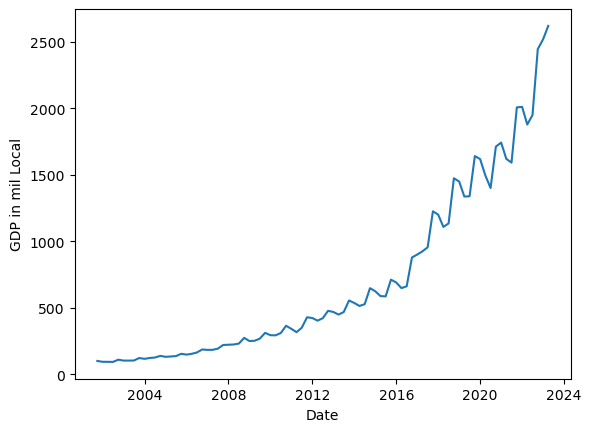

In [50]:
sns.lineplot(x = data['Date'], y = data['GDP in mil Local'])

In [51]:
f = sp.interpolate.CubicSpline(data['Date'], data['GDP in mil Local'], bc_type = 'natural')

In [62]:
full = pd.date_range("2001/09", "2023/04", freq = "M").to_series().reset_index(drop = True)

In [63]:
GDPi = pd.Series(f(full))

In [64]:
datai = pd.DataFrame({"Date": full, "GDP in mil Local": GDPi})

In [65]:
datai['GDP in mil Local'] *= 1e3

In [66]:
datai

,Date,GDP in mil Local
0,2001-09-30,9.980000e+04
1,2001-10-31,9.699154e+04
2,2001-11-30,9.474558e+04
3,2001-12-31,9.340000e+04
4,2002-01-31,9.327488e+04
...,...,...
254,2022-11-30,2.521612e+06
255,2022-12-31,2.517900e+06
256,2023-01-31,2.536176e+06
257,2023-02-28,2.570664e+06


<Axes: xlabel='Date', ylabel='GDP in mil Local'>

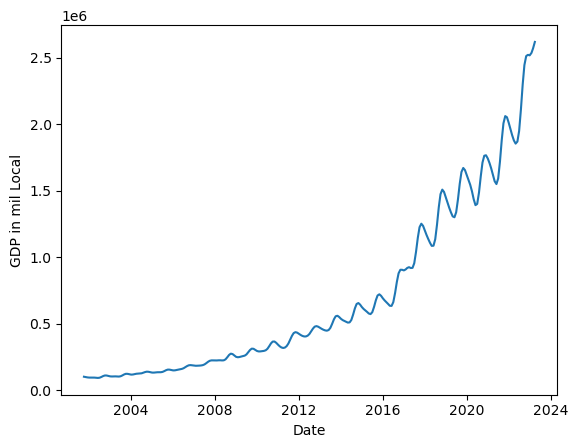

In [56]:
sns.lineplot(x = datai['Date'], y = datai['GDP in mil Local'])

In [57]:
datam = pd.merge(datai, exr, on = 'Date', how = 'left')

In [58]:
datam

,Date,GDP in mil Local,US/Local
0,2001-09-30,9.980000e+04,4.140000
1,2001-10-31,9.699154e+04,4.140000
2,2001-11-30,9.474558e+04,4.140000
3,2001-12-31,9.340000e+04,4.355000
4,2002-01-31,9.327488e+04,4.496000
...,...,...,...
254,2022-11-30,2.521612e+06,24.422364
255,2022-12-31,2.517900e+06,24.660455
256,2023-01-31,2.536176e+06,28.759262
257,2023-02-28,2.570664e+06,30.481627


In [60]:
datam['GDP in mil USD'] = datam['GDP in mil Local'] / datam['US/Local']

In [61]:
datam

,Date,GDP in mil Local,US/Local,GDP in mil USD
0,2001-09-30,9.980000e+04,4.140000,24106.280193
1,2001-10-31,9.699154e+04,4.140000,23427.908929
2,2001-11-30,9.474558e+04,4.140000,22885.405274
3,2001-12-31,9.340000e+04,4.355000,21446.613088
4,2002-01-31,9.327488e+04,4.496000,20746.193255
...,...,...,...,...
254,2022-11-30,2.521612e+06,24.422364,103250.120579
255,2022-12-31,2.517900e+06,24.660455,102102.739974
256,2023-01-31,2.536176e+06,28.759262,88186.411593
257,2023-02-28,2.570664e+06,30.481627,84334.862416
